<a href="https://colab.research.google.com/github/eniseirem/Tiny_Little_Studies/blob/master/Python_Tahminleyici_Analitik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

missing_values = ["n/a", "na", "--", " ?","?", " "]
header = ['CRIM',
    'ZN',
    'INDUS ',
   'CHAS',
    'NOX',
   'RM',
    'AGE',
  'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
     'B',
    'LSTAT',
    'MEDV' ]
data = pd.read_csv('housing.data', na_values=missing_values, names=header, header=None)
data.info

<bound method DataFrame.info of                                                   CRIM  ZN  ...  LSTAT  MEDV
0     0.00632  18.00   2.310  0  0.5380  6.5750  65... NaN  ...    NaN   NaN
1     0.02731   0.00   7.070  0  0.4690  6.4210  78... NaN  ...    NaN   NaN
2     0.02729   0.00   7.070  0  0.4690  7.1850  61... NaN  ...    NaN   NaN
3     0.03237   0.00   2.180  0  0.4580  6.9980  45... NaN  ...    NaN   NaN
4     0.06905   0.00   2.180  0  0.4580  7.1470  54... NaN  ...    NaN   NaN
..                                                 ...  ..  ...    ...   ...
501   0.06263   0.00  11.930  0  0.5730  6.5930  69... NaN  ...    NaN   NaN
502   0.04527   0.00  11.930  0  0.5730  6.1200  76... NaN  ...    NaN   NaN
503   0.06076   0.00  11.930  0  0.5730  6.9760  91... NaN  ...    NaN   NaN
504   0.10959   0.00  11.930  0  0.5730  6.7940  89... NaN  ...    NaN   NaN
505   0.04741   0.00  11.930  0  0.5730  6.0300  80... NaN  ...    NaN   NaN

[506 rows x 14 columns]>

In [131]:
data.isna().sum()

CRIM         0
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [132]:
from sklearn.datasets import load_boston

bst = load_boston()

data = pd.DataFrame(bst.data, columns = bst.feature_names)


In [100]:
data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [133]:
data_y = pd.DataFrame(bst.target, columns = ['price'])
df = data.join(data_y)


In [123]:
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  price
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90 

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.3, random_state=42)
LR = LinearRegression()
LR.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
from sklearn.metrics import mean_squared_error as mean_sq_err
from sklearn.metrics import mean_absolute_error as mean_abs_err
from sklearn.metrics import accuracy_score
import math
def print_result_metrics(num,X, y,y_pred):

    mse = mean_sq_err(y, y_pred)
    rmse = math.sqrt(mse)
    rse = math.sqrt(mse / (num - 2))
    rsquare = LR.score(X, y)
    mae = mean_abs_err(y, y_pred)

    return(print('RSE=',rse),
            print('R-Square=',rsquare),
            print('rmse=',rmse),
            print('mae=',mae))

In [135]:
pred = LR.predict(X_test)
num_data_test = X_test.shape[0]
print_result_metrics(num_data_test,X_test,y_test, pred)
LR.score(X_test, y_test)


RSE= 0.37874744647039665
R-Square= 0.7112260057484974
rmse= 4.638689926172788
mae= 3.1627098714573685


0.7112260057484974

In [124]:
#categorical
X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.3, random_state=11)


bins = [0, 15, 25, 30, np.inf]
names = ['<15', '15-25', '25-30', '30+']

data_y['price'] = pd.cut(data_y['price'], bins, labels=names)

data_y.head

<bound method NDFrame.head of      price
0    15-25
1    15-25
2      30+
3      30+
4      30+
..     ...
501  15-25
502  15-25
503  15-25
504  15-25
505    <15

[506 rows x 1 columns]>

In [125]:
data_y.info

<bound method DataFrame.info of      price
0    15-25
1    15-25
2      30+
3      30+
4      30+
..     ...
501  15-25
502  15-25
503  15-25
504  15-25
505    <15

[506 rows x 1 columns]>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


check


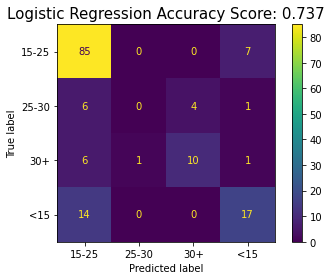

In [126]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.3, random_state=42)

encoder = OneHotEncoder(handle_unknown="ignore")

encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
lr = LogisticRegression(random_state=42, class_weight=None, solver='lbfgs', max_iter=600)
def LR(X_train, y_train,X_test,y_test):
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    score = round(accuracy_score(y_test, predictions), 3)
    return score,predictions

score, predictions = LR(X_train, y_train,X_test,y_test)

from sklearn.metrics import plot_confusion_matrix

def heatmap_cm(clf,X, y, acc, name):
    plot_confusion_matrix(clf, X, y)
    plt.title('{0} Accuracy Score: {1}'.format(name,acc), size = 15)
    print("check")
    plt.show()


heatmap_cm(lr, X_test, y_test, score, "Logistic Regression")

In [136]:
#random forest reg
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=13, random_state=0)
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [137]:
y_pred = rf.predict(X_test)

In [138]:
print_result_metrics(num_data_test,X_test,y_test, y_pred)


RSE= 0.25233668824021943
R-Square= 0.7112260057484974
rmse= 3.0904806478614706
mae= 2.123960732618147


(None, None, None, None)

[1, 2, [3, 4]]
